In [17]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from tqdm import tqdm
import random
import math

class SAG:
    def __init__(self, dataFile='../Data/covtype/covtype.libsvm.binary.scale', alpha=0.00001, epsilon=0.1, times=1000000, features=54, bench_size=30, size=10000):
        self.dataFile = dataFile
        self.alpha = alpha
        self.times = times
        self.epsilon = epsilon
        self.bench_size = bench_size
        self.features = features+1
        self.value1 = []
        self.value2 = []
        # must can be divide by 5
        self.size = size
        self.get_info(self.dataFile, True)
        self.omega = np.ones((1 ,self.features))
        
    def get_info(self, dataFile, select_part=False):
        y_data = []
        x_data = []
        with open(dataFile) as f:
            line = f.readline()
            index = 0
            while line:
                y_data.append(int(line[0])-1)
                info = line[2:-2].split(' ')
                x = [0]*(self.features)
                x[0] = 1
                for i in info:
                    i = i.split(':')
                    x[int(i[0])] = float(i[1])
                x_data.append(x)
                line = f.readline()
                if select_part == True:
                    index += 1
                    if index >= self.size:
                        break
            self.size = len(y_data)
                    
            y_test = []
            x_test = []
            for i in range(int(self.size/5)):
                randIndex = int(np.random.uniform(0, len(y_data)))
                y_test.append(y_data[randIndex])
                x_test.append(x_data[randIndex])
                del(y_data[randIndex])
                del(x_data[randIndex])
                        
            self.y_train = np.mat(y_data).reshape(-1, 1)
            self.x_train = np.mat(x_data)
            self.y_test = np.mat(y_test).reshape(-1, 1)
            self.x_test = np.mat(x_test)
        
    def get_loss(self, set=1):
        error = 0
        if set == 1: 
            # train loss
            len = self.y_train.shape[0]         
            for i in range(len):
                h = self.get_h(i, set)
                error += self.y_train[i, 0]*math.log(h)+(1-self.y_train[i, 0])*math.log(1-h)
            return -error/len
        else:
            # test loss
            len = self.y_test.shape[0]
            for i in range(len):
                h = self.get_h(i, set)
                error += self.y_test[i, 0]*math.log(h)+(1-self.y_test[i, 0])*math.log(1-h)
            return -error/len
    
    def get_h(self, index, set):
        if set == 1:
            return 1/(1+math.exp((-self.omega*self.x_train[index].T)[0, 0]))
        else:
            return 1/(1+math.exp((-self.omega*self.x_test[index].T)[0, 0]))
    
    def get_gradient(self, index):
        # using logistic regression loss
        return (self.get_h(index, 1)-self.y_train[index, 0])*self.x_train[index]
    
    def solve(self):
        d = np.zeros((1, self.features))
        g = []
        gradient = np.zeros((self.size, self.features))
        len = self.y_test.shape[0]
        for i in tqdm(range(self.times)):
        # for i in range(self.times):
            index = random.randint(0, len-1)
            g = self.get_gradient(index)
            d = d-gradient[index]+g
            gradient[index] = g
            self.omega -= self.alpha/len * d
            
            
            if i%1000 == 0:
                loss1 = self.get_loss(1)
                # print(loss1)
                self.value1.append(loss1)
                loss2 = self.get_loss(2)
                self.value2.append(loss2)
        
    def draw(self):
        x = range(0, self.times, 1000)
        y1 = self.value1
        y2 = self.value2
        plt.title('Train_Loss_list')
        plt.plot(x, y1, label="Train_Loss_list")
        plt.show()
        plt.title('Test_Loss_list')
        plt.plot(x, y2, label="Test_Loss_list")
        plt.show()

a = SAG()

In [18]:
a.solve()
print(a.get_loss(1))
print(a.get_loss(2))
# a.draw()

100%|██████████| 1000000/1000000 [02:47<00:00, 5972.43it/s]

0.6173767578756425
0.6125856519827992


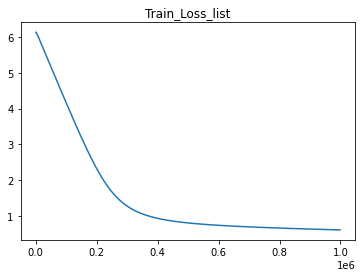

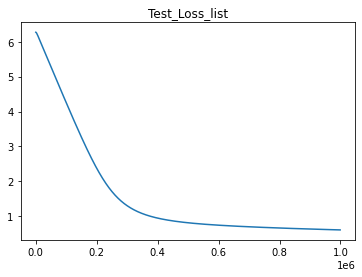

In [19]:
a.draw()